In [1]:
#MODULE IMPORTATION AND ENVIRONMENT CONFIGURATION
import re
import unicodedata
import pickle
import warnings

from time import time
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import inflect

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

from nltk import pos_tag
from nltk import punkt
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from utility_ML import *

##### UNCOMMENT THIS SECTION ON FIRST EXECUTION
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
#####

plt.style.use('fivethirtyeight') #choose fivethirtyeight style for plt
warnings.filterwarnings('ignore', category=FutureWarning) #filter FutureWarnings

In [3]:
#IMPORTATION OF DATASETS

#importation of project Dataset
test_data = import_dataset(TEST_DATA_PATH, 'Avis Test Dataset', sep='\t', names=['Avis'])
test_labels = import_dataset(TEST_TARGET_PATH, 'Score Test Dataset', sep='\t', names=['Score'])
project_df = merge_datasets(test_data, test_labels)
project_df = shuffle_dataset(project_df)

#importation of IMDB Dataset
imdb_df = import_dataset(IMDB_DATA_PATH, 'IMDB Opinions Dataset', sep='\t', names=['Avis', 'Score'])


Avis Test Dataset
Size : (4000, 1)
Head of imported dataset :


,Avis
0,I cant help it but i seem to like films that a...
1,I expected to enjoy a romantic comedy featurin...
2,Why is it that when a star reaches the top of ...
3,What Is It? is a mish-mash of bizarre recurrin...
4,"...am i missing something here??? ""unexpected ..."



Score Test Dataset
Size : (4000, 1)
Head of imported dataset :


,Score
0,-1
1,-1
2,-1
3,-1
4,-1


Size : (4000, 2)
Head of merged dataset :


,Avis,Score
0,I cant help it but i seem to like films that a...,-1
1,I expected to enjoy a romantic comedy featurin...,-1
2,Why is it that when a star reaches the top of ...,-1
3,What Is It? is a mish-mash of bizarre recurrin...,-1
4,"...am i missing something here??? ""unexpected ...",-1


Head of shuffled dataset :


,Avis,Score
0,I've always liked Johnny Concho and I wish thi...,1
1,This is almost certainly the worst Western I'v...,-1
2,Vampires Vs. Zombies starts with the breaking ...,-1
3,Anarchy and lawlessness reign supreme in the p...,1
4,"Slow, Slow, Slow... There is no mystery or exc...",-1



IMDB Opinions Dataset
Size : (10000, 2)
Head of imported dataset :


,Avis,Score
0,"Some of the secondary actors try, really hard....",-1
1,This movie is like Happiness meets Lost in Tra...,1
2,Recycled and predictable plot. The characters ...,-1
3,I saw this on cable. Someone had to lose their...,-1
4,What could have been some majorly creepy stuff...,-1


In [6]:
#CLASSIFIERS LOADING USING PICKLE

#loading the pipeline containing the trained GaussianNB classifier
gnb_loaded = pickle.load(open(GAUSSIANNB_PATH, 'rb'))

#loading the pipeline containing the trained LogisticRegression classifier
lr_loaded = pickle.load(open(LOGISTICREGRESSION_PATH, 'rb'))

In [7]:
#PREDICTION ON PROJECT DATASET

#prediction of data on the project Dataset using the LogisticRegression classifier
start_time = time()
print('\nLogisticRegression classifier prediction of project dataset started at {}'.format(datetime.now()))
prediction_results = lr_loaded.predict(project_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, project_df['Score'])
conf = confusion_matrix(project_df['Score'], prediction_results)
report = classification_report(project_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))

#prediction of data on the project Dataset using the GaussianNB classifier
start_time = time()
print('\nGaussianNB classifier prediction of project dataset started at {}'.format(datetime.now()))
prediction_results = gnb_loaded.predict(project_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, project_df['Score'])
conf = confusion_matrix(project_df['Score'], prediction_results)
report = classification_report(project_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))


LogisticRegression classifier prediction of project dataset started at 2019-04-17 21:55:34.656384

Time taken to complete prediction: 40.14556813240051 seconds

Accuracy: 0.895
Confusion Matrix
[[1770  230]
 [ 190 1810]]

Classification Report
              precision    recall  f1-score   support

          -1       0.90      0.89      0.89      2000
           1       0.89      0.91      0.90      2000

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.90      0.90      0.89      4000
weighted avg       0.90      0.90      0.89      4000



GaussianNB classifier prediction of project dataset started at 2019-04-17 21:56:14.813747

Time taken to complete prediction: 41.085824489593506 seconds

Accuracy: 0.844
Confusion Matrix
[[1666  334]
 [ 290 1710]]

Classification Report
              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      2000
           1       0.84      0.85      0.85      2000

   micro avg       0.84  

In [8]:
#PREPROCESSING OF IMDB DATASET FOR VISUALIZATION
imdb_transformed = imdb_df.copy()
imdb_transformed['Avis'] = preprocess_dataset(imdb_transformed['Avis'])
display(imdb_transformed['Avis'].head())

0    secondary try really hard camera shot desert q...
1    like happiness meet lose translation sixth sen...
2    recycle predictable memorable line come minute...
3    saw cable someone lose job greenlighting one a...
4    could majorly creepy stuff end incomprehensibl...
Name: Avis, dtype: object

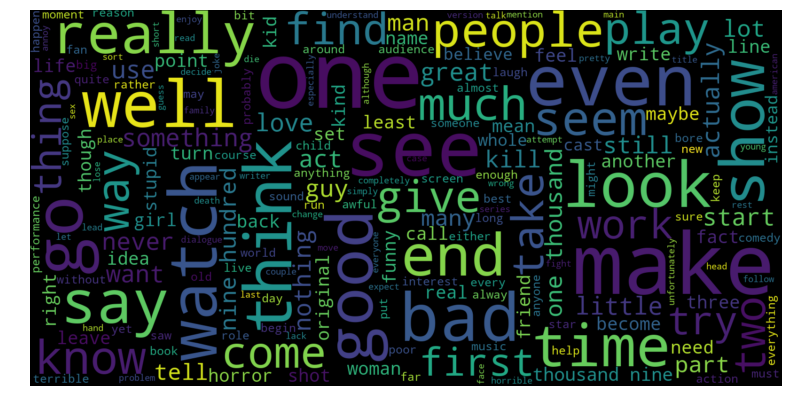

In [9]:
#VISUALIZING MOST FREQUENT WORD IN NEGATIVE OPINIONS
neg_avis = imdb_transformed[imdb_transformed['Score']==-1]
neg_avis = [document for document in neg_avis['Avis']]
neg_avis = pd.Series(neg_avis).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_avis)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

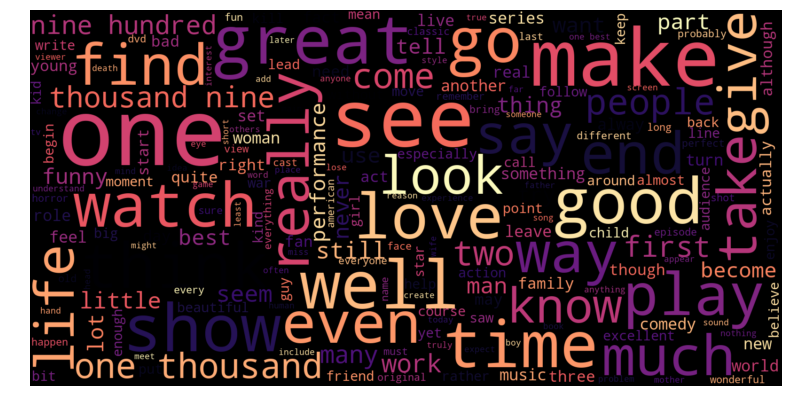

In [10]:
#VISUALIZING MOST FREQUENT WORD IN POSITIVE OPINIONS
pos_avis = imdb_transformed[imdb_transformed['Score']==1]
pos_avis = [document for document in pos_avis['Avis']]
pos_avis = pd.Series(pos_avis).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='magma').generate(pos_avis)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
#PREDICTION ON IMDB DATASET

#prediction of data on the IMDB Dataset using the LogisticRegression classifier
start_time = time()
print('\nLogisticRegression classifier prediction of IMDB dataset started at {}'.format(datetime.now()))
prediction_results = lr_loaded.predict(imdb_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, imdb_df['Score'])
conf = confusion_matrix(imdb_df['Score'], prediction_results)
report = classification_report(imdb_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))

#prediction of data on the IMDB Dataset using the GaussianNB classifier
start_time = time()
print('\nGaussianNB classifier prediction of IMDB dataset started at {}'.format(datetime.now()))
prediction_results = gnb_loaded.predict(imdb_df['Avis'])
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, imdb_df['Score'])
conf = confusion_matrix(imdb_df['Score'], prediction_results)
report = classification_report(imdb_df['Score'], prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))


LogisticRegression classifier prediction of IMDB dataset started at 2019-04-17 22:00:32.164604

Time taken to complete prediction: 107.22002959251404 seconds

Accuracy: 0.8505
Confusion Matrix
[[4107  893]
 [ 602 4398]]

Classification Report
              precision    recall  f1-score   support

          -1       0.87      0.82      0.85      5000
           1       0.83      0.88      0.85      5000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



GaussianNB classifier prediction of IMDB dataset started at 2019-04-17 22:02:19.408454

Time taken to complete prediction: 108.04267287254333 seconds

Accuracy: 0.772
Confusion Matrix
[[3634 1366]
 [ 914 4086]]

Classification Report
              precision    recall  f1-score   support

          -1       0.80      0.73      0.76      5000
           1       0.75      0.82      0.78      5000

   micro avg       0.77      

In [12]:
avis = [
    'This is an awesome movie and I highly recommend it. I thought it was bad at first, but then it evolved greatly',
    'This is a useless piece of crap, I don\'t know why would anyone even pay to watch this!',
    'Absolute rubbish! I\'ve wasted so much of my time watching this... I was it was over to be quite honest',
    'Absolutely amazing! I highly advise people to go over this. I would watch it 100 times and never get bored of it',
    'A total crapfest. People should know better than to watch movies directed by John Liberman anyway. I hope they stop their funding for future movies. I hated it!',
    'I\'m in love with the characters and the plot in this film. To be honest, I thought it was going to be useless, but I was absolutely wrong! It\'s kind of brilliant actually.',
    'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.'
]

target = [1, -1, -1, 1, -1, 1, -1]

#prediction using LogisticRegression Classifier
start_time = time()
print('\nLogisticRegression classifier prediction on custom dataset started at {}'.format(datetime.now()))
prediction_results = lr_loaded.predict(avis)
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, target)
conf = confusion_matrix(target, prediction_results)
report = classification_report(target, prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))

#prediction using GaussianNB Classifier
start_time = time()
print('\nGaussianNB classifier prediction on custom dataset started at {}'.format(datetime.now()))
prediction_results = gnb_loaded.predict(avis)
print('\nTime taken to complete prediction: {} seconds'.format(time() - start_time))

#accuracy, confusion matrix and classification report of the classifier
accuracy = accuracy_score(prediction_results, target)
conf = confusion_matrix(target, prediction_results)
report = classification_report(target, prediction_results)
print('''
Accuracy: {}
Confusion Matrix
{}

Classification Report
{}
'''.format(accuracy, conf, report))


LogisticRegression classifier prediction on custom dataset started at 2019-04-17 22:04:39.137786

Time taken to complete prediction: 0.02128767967224121 seconds

Accuracy: 0.7142857142857143
Confusion Matrix
[[2 2]
 [0 3]]

Classification Report
              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

   micro avg       0.71      0.71      0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



GaussianNB classifier prediction on custom dataset started at 2019-04-17 22:04:39.163503

Time taken to complete prediction: 0.018364429473876953 seconds

Accuracy: 0.5714285714285714
Confusion Matrix
[[2 2]
 [1 2]]

Classification Report
              precision    recall  f1-score   support

          -1       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3

   micro avg       0.